# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#print(api_key)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [153]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [154]:
# Set up OpenWeather API Call for 1 City
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
#query_url

In [155]:
# Create a copy of the city list that will get eaten by the while loop requests
myCities = cities[0 : len(cities)]
if 'st. louis' not in myCities :
    print(f"Adding your favorite city to the list")
    myCities.append("st. louis")
    
print(len(myCities))

Adding your favorite city to the list
597


In [156]:
# Initialize results lists: City Cloudiness Country Date Humidity Lat Lng Max Temp Wind Speed
mycities_list=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
maxtemp=[]
windspeed=[]
i = 0
count = 0

# iterate through the cities list
# if city is able to be processed pop it off the list
# documentation for openweather free api says it only allows 60 calls per minute.
# expecting to get some sort of response and exeption 

print(f"Beginning Request and Retrieval of city weather data")
while len(myCities) > 0: 

    city = myCities[-1]
    i += 1
    print(f"[{i}] Processing weather data for city: {city}")
    res = requests.get(query_url + city)
    resStatus = res.status_code
    response = res.json()

    try :

        if (resStatus == 200) :
            mycities_list.append(city)
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            maxtemp.append(response['main']['temp_max'])
            windspeed.append(response['wind']['speed'])
            count += 1
            myCities.pop(-1)

        elif (resStatus == 404) :
            print(f"City not found. Skipping city: {city}")
            myCities.pop(-1)

        elif (resStatus == 429) :
            # I never received this limit response
            print(f"Exceed limit of 60 API calls/minute. Waiting 20 seconds and trying again...")
            time.sleep(20)
        
    except KeyError as err:
        # This is catch for any unexpected key errors.  Never recieved this exception either
        print(f"Unexepected response received: {response['message']}. Skipping city: {city}")
        myCities.pop(-1)
        
print(f"\nNumber of cities processed: {count}")


Beginning Request and Retrieval of city weather data
[1] Processing weather data for city: st. louis
[2] Processing weather data for city: tessalit
[3] Processing weather data for city: bandundu
[4] Processing weather data for city: gilbues
[5] Processing weather data for city: cercal
[6] Processing weather data for city: cairns
[7] Processing weather data for city: guatire
[8] Processing weather data for city: aktash
City not found. Skipping city: aktash
[9] Processing weather data for city: asosa
[10] Processing weather data for city: nuevo progreso
[11] Processing weather data for city: calbuco
[12] Processing weather data for city: viedma
[13] Processing weather data for city: waipawa
[14] Processing weather data for city: olafsvik
City not found. Skipping city: olafsvik
[15] Processing weather data for city: filingue
[16] Processing weather data for city: atasu
[17] Processing weather data for city: washington
[18] Processing weather data for city: manga
[19] Processing weather da

[153] Processing weather data for city: sars
[154] Processing weather data for city: saldanha
[155] Processing weather data for city: minchinabad
[156] Processing weather data for city: heihe
[157] Processing weather data for city: bolungarvik
City not found. Skipping city: bolungarvik
[158] Processing weather data for city: kazalinsk
City not found. Skipping city: kazalinsk
[159] Processing weather data for city: ponyri
[160] Processing weather data for city: san cristobal
[161] Processing weather data for city: kaeo
[162] Processing weather data for city: jaen
[163] Processing weather data for city: espanola
[164] Processing weather data for city: padang
[165] Processing weather data for city: imbituba
[166] Processing weather data for city: kaili
[167] Processing weather data for city: florencia
[168] Processing weather data for city: djambala
[169] Processing weather data for city: tailai
[170] Processing weather data for city: belyy yar
[171] Processing weather data for city: bela

[309] Processing weather data for city: nantucket
[310] Processing weather data for city: kieta
[311] Processing weather data for city: sorong
[312] Processing weather data for city: sao joao da barra
[313] Processing weather data for city: flinders
[314] Processing weather data for city: grand centre
City not found. Skipping city: grand centre
[315] Processing weather data for city: alibag
[316] Processing weather data for city: qaracala
[317] Processing weather data for city: sept-iles
[318] Processing weather data for city: viligili
City not found. Skipping city: viligili
[319] Processing weather data for city: novaya lyalya
[320] Processing weather data for city: yerbogachen
[321] Processing weather data for city: lavrentiya
[322] Processing weather data for city: vila franca do campo
[323] Processing weather data for city: maningrida
[324] Processing weather data for city: kamalia
[325] Processing weather data for city: bandarbeyla
[326] Processing weather data for city: north ben

[460] Processing weather data for city: karpuninskiy
City not found. Skipping city: karpuninskiy
[461] Processing weather data for city: ozgon
City not found. Skipping city: ozgon
[462] Processing weather data for city: tarbes
[463] Processing weather data for city: nouadhibou
[464] Processing weather data for city: alotau
City not found. Skipping city: alotau
[465] Processing weather data for city: barentsburg
City not found. Skipping city: barentsburg
[466] Processing weather data for city: antalaha
[467] Processing weather data for city: denia
[468] Processing weather data for city: shimoda
[469] Processing weather data for city: bozoum
[470] Processing weather data for city: jumla
[471] Processing weather data for city: kyabe
[472] Processing weather data for city: vaini
[473] Processing weather data for city: port said
[474] Processing weather data for city: dikson
[475] Processing weather data for city: talaya
[476] Processing weather data for city: general pico
[477] Processing 

In [157]:
# 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [158]:
colnames = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed']
data = list(zip(mycities_list, cloudiness, country, date, humidity, lat, lon, maxtemp, windspeed))


In [159]:
cityWeather_df = pd.DataFrame(data, columns=colnames)
cityWeather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,st. louis,90,US,1574227887,82,38.63,-90.20,43.00,1.28
1,tessalit,100,ML,1574227891,13,20.20,1.01,68.04,5.61
2,bandundu,94,CD,1574227891,92,-3.32,17.38,74.57,2.46
3,gilbues,66,BR,1574227891,63,-9.83,-45.34,77.13,1.52
4,cercal,100,PT,1574227891,94,37.80,-8.67,54.00,1.99
...,...,...,...,...,...,...,...,...,...
522,puerto ayora,0,EC,1574228015,81,-0.74,-90.35,70.00,4.00
523,hasaki,20,JP,1574228015,28,35.73,140.83,59.00,19.46
524,hilo,90,US,1574227950,78,19.71,-155.08,78.80,0.38
525,ponta do sol,100,BR,1574228016,94,-20.63,-46.00,65.86,2.73


In [160]:
#export daata to csv
export_csv = cityWeather_df.to_csv(output_data_file, index = None, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [161]:
# Get Date of the data to build titles
#https://docs.python.org/3/library/datetime.html#datetime-objects
# https://stackoverflow.com/questions/9744775/how-to-convert-integer-timestamp-to-python-datetime
# https://stackoverflow.com/questions/52733516/python-3-7-0-how-do-i-format-datetime-to-mm-dd-yy-hhmmss
# ttps://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

datestamp = cityWeather_df.loc[0]['Date']
myDatetime = datetime.datetime.fromtimestamp(datestamp)
dateStr = myDatetime.strftime('%Y/%m/%d %H:%M:%S')
dateStr


'2019/11/19 23:31:27'

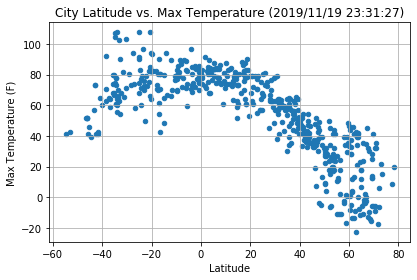

In [162]:
title = f"City Latitude vs. Max Temperature ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Max Temp", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")

plt.tight_layout()
plt.show()


#  Observation 1 - Latitude vs Temperature 

* It is hotter in the southern hemisphere and near the equator than it is in northern hemisphere. 
* The further north you go the colder it is. 


#### Latitude vs. Humidity Plot

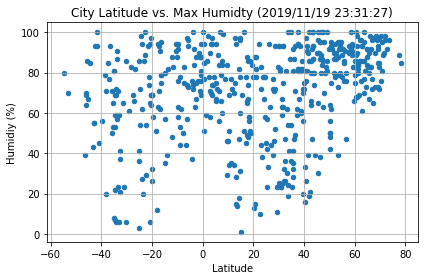

In [163]:
title = f"City Latitude vs. Max Humidty ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Humidity", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidiy (%)")

plt.tight_layout()
plt.show()

# Observation 2 - Latitude vs Humidty

* Humidty un between latitudes -15 and +15 (near the equator) has high floor (40%).  It is humid near the eaquator.
* Humidty above latitud +45 and below latitude -45 is high also


#### Latitude vs. Cloudiness Plot

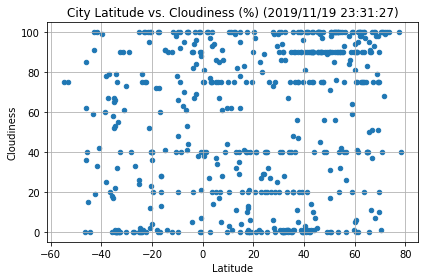

In [164]:
title = f"City Latitude vs. Cloudiness (%) ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

plt.tight_layout()
plt.show()

# Observation 3 -  Latitude vs. Cloudiness

* The scatter plot approaches horizontal levels of cloudiness across ranges if latitude.
* Maybe these levels of cloudiness reflect frontal boundaries?   Futher investgation required.

#### Latitude vs. Wind Speed Plot

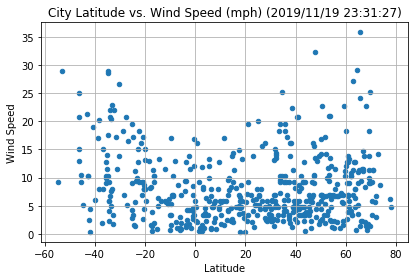

In [165]:
title = f"City Latitude vs. Wind Speed (mph) ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")

plt.tight_layout()
plt.show()

# Observation 4 -  Wind Speeds

* Wind speeds trend higher above +60 latitude and below -30 latitude.